In [88]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%run fetch_model_helper.py
%run diurnal_utils.py

In [89]:
rel_cmip6_path= '/export/data1/cchristo/CMIP6_clouds/cl_mon_historical/'
rel_cmip5_path= '/export/data1/cchristo/CMIP5_clouds/clt_mon_historical/'

cmip_rel_dir = rel_cmip6_path

# save_output_rel_dir = '/export/data1/cchristo/CMIP6_clouds/averages/clt_averages/period/clt/'
save_output_rel_dir = '/export/data1/cchristo/CMIP5_clouds/averages/clt_averages/period/clt/'

unique_cmip6_models = list(get_unique_models(rel_cmip6_path))
unique_cmip5_models = get_unique_models(rel_cmip5_path)

In [90]:
start_date = '1985-01'
end_date = '2006-01'

In [135]:
ds = xr.open_dataset('/export/data1/cchristo/CMIP6_clouds/averages/time_averages/period/cltl_regridded/grid1/' + 
                     'CanESM5/grid1_1985-01_2006-01_mean.nc')


In [137]:
# ds['cl'].plot.imshow()
ds['cl']

<xarray.DataArray 'cl' (lat: 240, lon: 720)>
array([[60.935356, 60.935356, 60.935356, ..., 60.778812, 60.935356, 60.935356],
       [60.935356, 60.935356, 60.935356, ..., 60.778812, 60.935356, 60.935356],
       [60.935356, 60.935356, 60.935356, ..., 60.778812, 60.935356, 60.935356],
       ...,
       [29.593716, 29.593716, 29.593716, ..., 39.736652, 29.593716, 29.593716],
       [40.145126, 40.145126, 40.145126, ..., 41.543869, 40.145126, 40.145126],
       [40.145126, 40.145126, 40.145126, ..., 41.543869, 40.145126, 40.145126]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 -60.0 -59.5 -59.0 -58.5 -58.0 ... 58.0 58.5 59.0 59.5

In [138]:
ds.rename({'cl':'clh'})

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 720)
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 -60.0 -59.5 -59.0 -58.5 -58.0 ... 58.0 58.5 59.0 59.5
Data variables:
    clh      (lat, lon) float64 60.94 60.94 60.94 60.92 ... 41.54 40.15 40.15
Attributes:
    regrid_method:  nearest_s2d

In [102]:
low_mean = ds.sel(lev = slice(1,0.68), time = slice(start_date, end_date)).max('lev').mean(['time'])
high_mean = ds.sel(lev = slice(0.44,0), time = slice(start_date, end_date)).max('lev').mean(['time'])

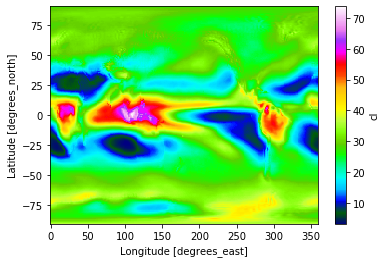

In [106]:
high_mean['cl'].plot.imshow(cmap = plt.get_cmap('gist_ncar'))

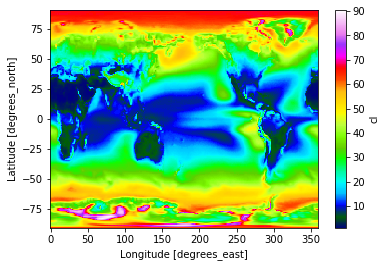

In [109]:
# low_mean.
low_mean['cl'].plot.imshow(cmap = plt.get_cmap('gist_ncar'))

In [190]:
# dds = xr.open_mfdataset()

## Sanity Check Output

In [211]:
# cld_level_dir = '/export/data1/cchristo/CMIP6_clouds/averages/time_averages/period/cltl_regridded/grid1/'
cld_level_dir = '/export/data1/cchristo/CMIP6_clouds/averages/time_averages/period/cltl/'

ACCESS-ESM1-5


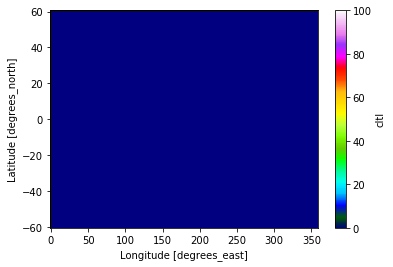

BCC-ESM1


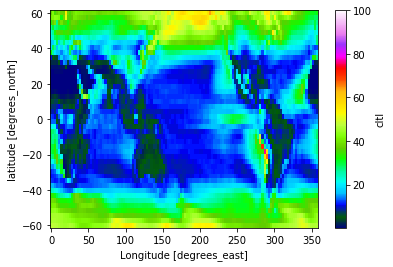

E3SM-1-0


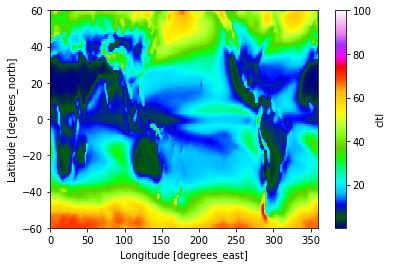

E3SM-1-1


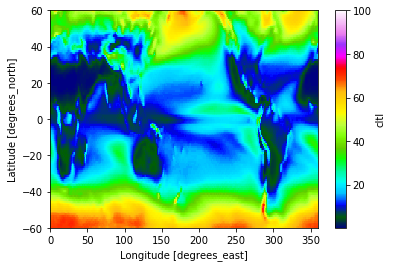

CESM2


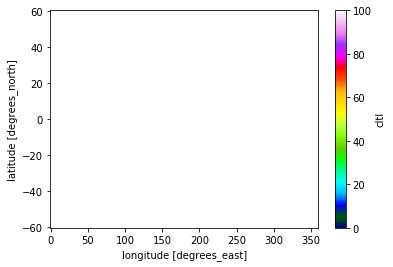

GFDL-ESM4


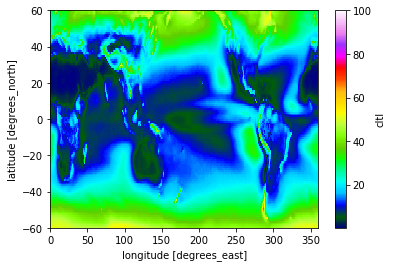

GISS-E2-1-H


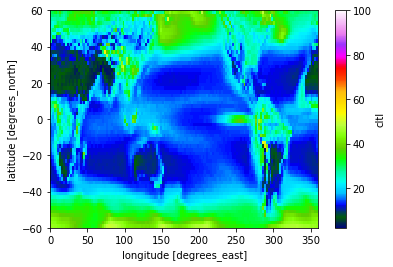

NESM3


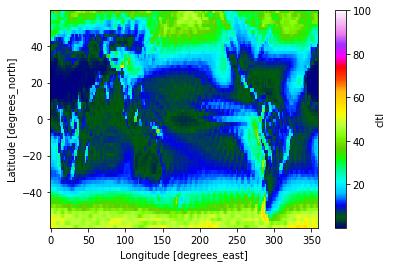

MIROC-ES2L


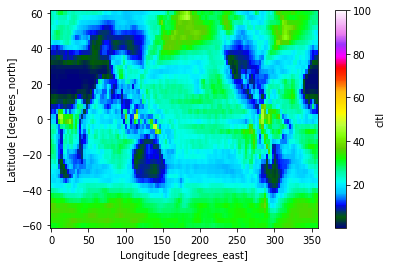

CAMS-CSM1-0


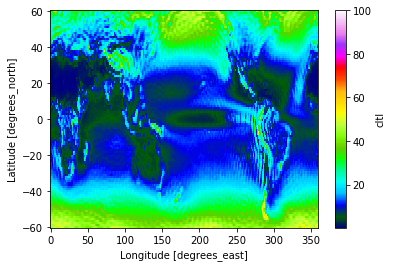

CAS-ESM2-0


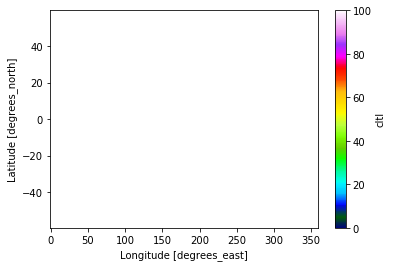

MIROC6


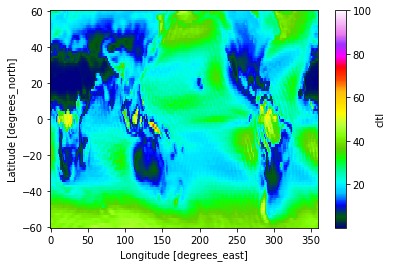

FGOALS-f3-L


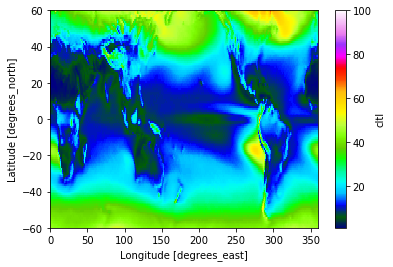

CESM2-FV2


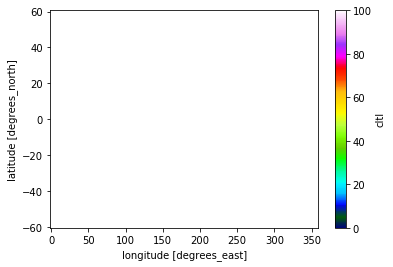

TaiESM1


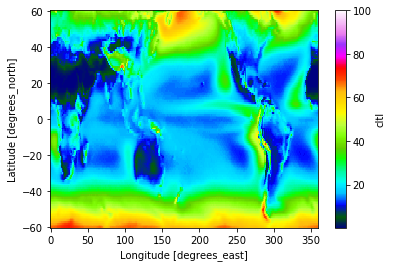

CIESM


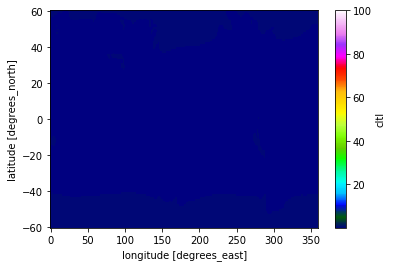

FGOALS-g3


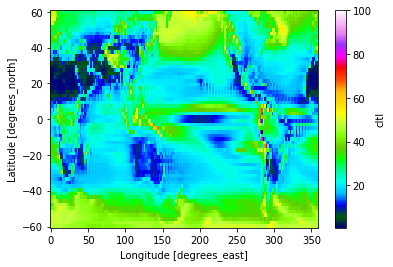

CanESM5


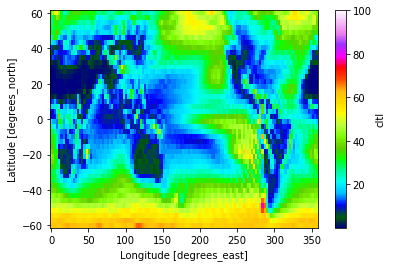

SAM0-UNICON


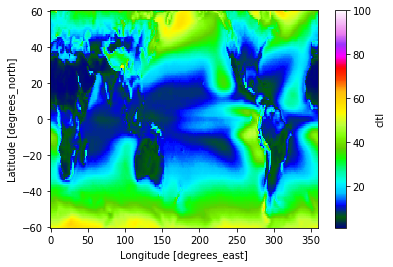

CESM2-WACCM-FV2


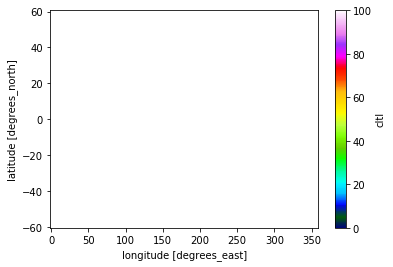

MPI-ESM1-2-LR


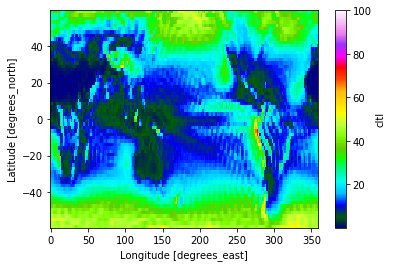

CESM2-WACCM


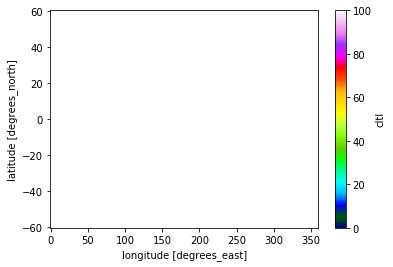

CMCC-CM2-SR5


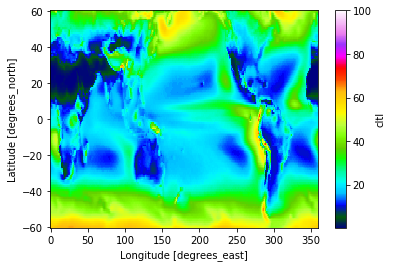

MRI-ESM2-0


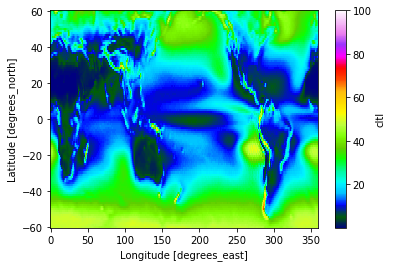

CNRM-ESM2-1


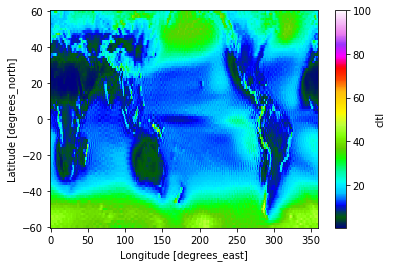

CNRM-CM6-1-HR


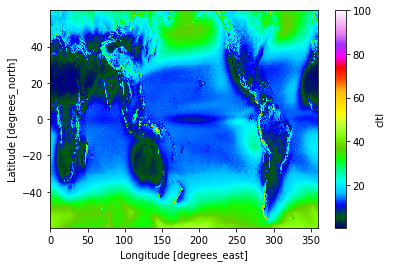

GISS-E2-1-G


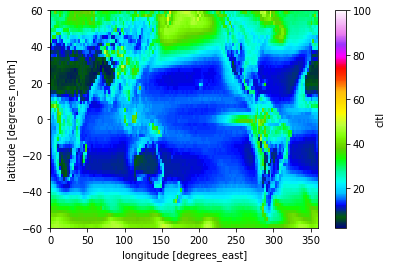

AWI-ESM-1-1-LR


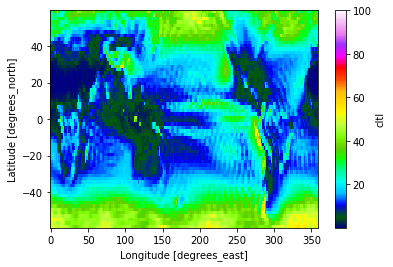

CNRM-CM6-1


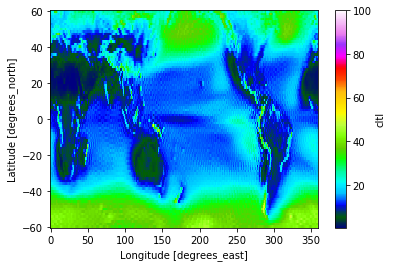

BCC-CSM2-MR


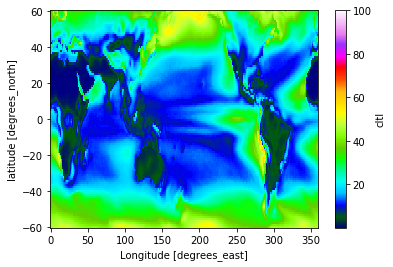

NorESM2-LM


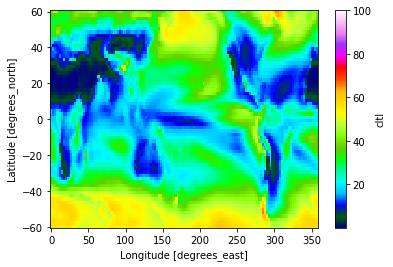

ACCESS-CM2


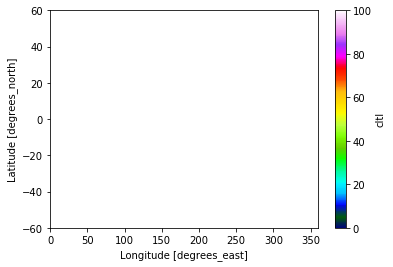

NorESM2-MM


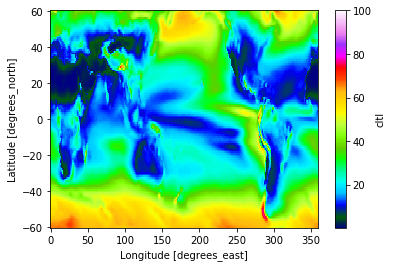

In [212]:
for model_name in  os.listdir(cld_level_dir):
    try:
        print(model_name)
        plt.figure()
        ds = xr.open_dataset(cld_level_dir + model_name + '/1985-01_2006-01_mean.nc')
        ds['cltl'].plot.imshow(cmap = plt.get_cmap('gist_ncar'), vmax = 100)
        plt.show()
    except Exception as e:
        print(e)

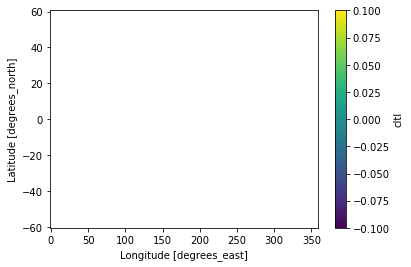